In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("customer churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replace bank space in total charge with 0 as tenure is 0 

In [4]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
# change datatype of totalcarge
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check null value is ornot
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# whether duplicate entries is or not
df["customerID"].duplicated().sum()

np.int64(0)

In [9]:
# define a function to converted 0 and 1 of seniorcitizen to yes/no to make easier to understad
def conv(value):
    if value==1:
        return"Yes"
    else :
        return "No"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# how many customer churn out

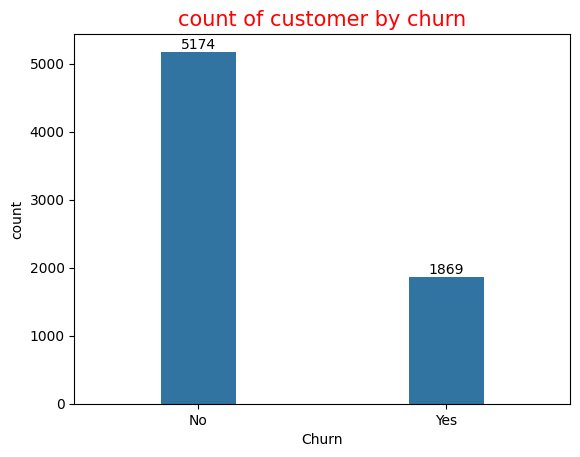

In [12]:
ax=sns.countplot(x="Churn", data=df,width=0.3)
ax.bar_label(ax.containers[0])
plt.title("count of customer by churn",size=15,color='red')
plt.show()

Text(0.5, 1.0, 'percentage of Churn ')

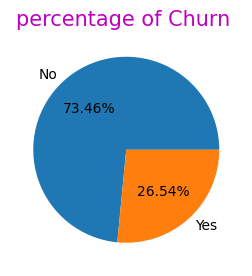

In [13]:
#group by churn count
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("percentage of Churn ",size=15,color='m')

#from given pie chart we can conclude that 26.54% of our customer churnned out 
#now lets explore the reasone behind it

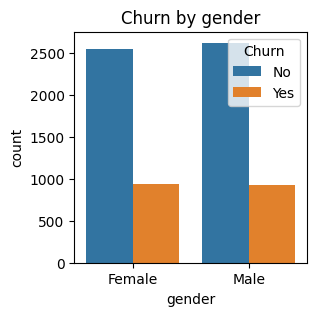

In [14]:
#count plot for gender colum
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by gender")
plt.show()
           

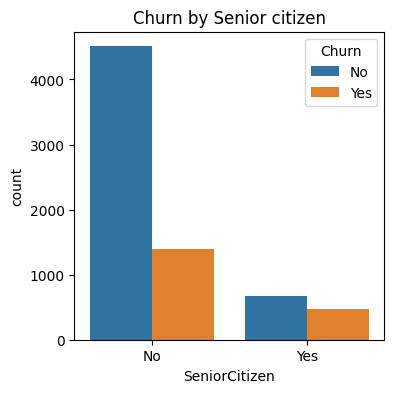

In [15]:
# countplot senior citizen 
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
plt.title("Churn by Senior citizen")
plt.show()

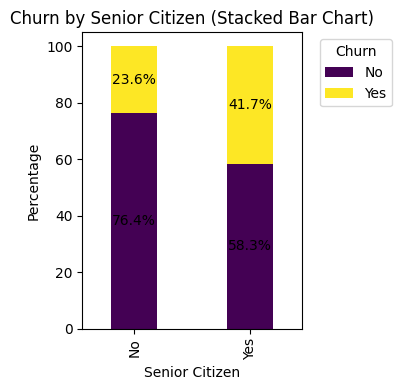

In [16]:


# Assuming `df` is your DataFrame
# Step 1: Calculate counts and percentages
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
senior_totals = df.groupby('SeniorCitizen').size().reset_index(name='total')
senior_churn = senior_churn.merge(senior_totals, on='SeniorCitizen')
senior_churn['percentage'] = (senior_churn['count'] / senior_churn['total']) * 100

# Step 2: Pivot the data for stacked bar chart
stacked_data = senior_churn.pivot(index='SeniorCitizen', columns='Churn', values='percentage')

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
stacked_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis', width=0.4)

# Step 4: Add percentage labels to the bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Avoid labeling zero-height segments
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10
            )

# Step 5: Customize the plot
ax.set_title("Churn by Senior Citizen (Stacked Bar Chart)")
ax.set_ylabel("Percentage")
ax.set_xlabel("Senior Citizen")
ax.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


#comprative a greater percentage of peopole in senior citizen cayegory have churnned as no senior citizen of people

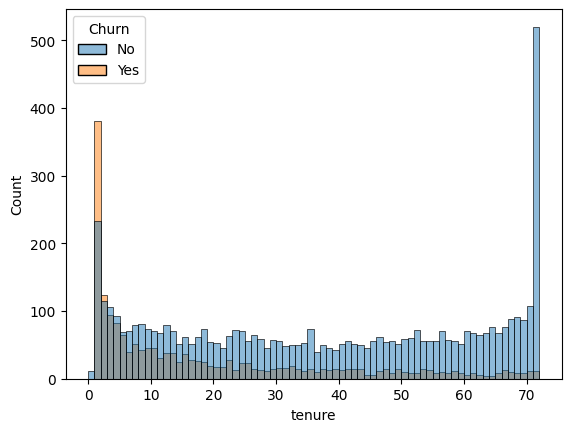

In [17]:
#histogram pot based on tenure
sns.histplot(x='tenure',data=df,bins=72,hue='Churn')
plt.show()

#people who have use our services for a long time have stayed and people who have used our services #1 or #2 months have churned

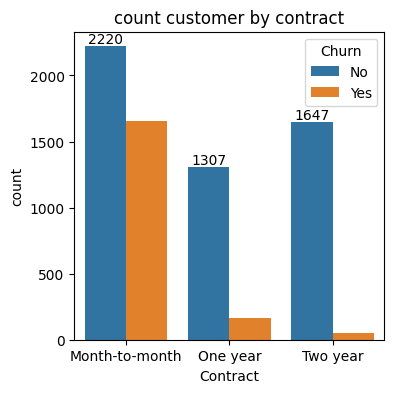

In [18]:
#count plot based on contract
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("count customer by contract")
plt.show()

#compratively people who have month - to-monnth contract have churned out our compnay other than who have 1 or 2 year contract 

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

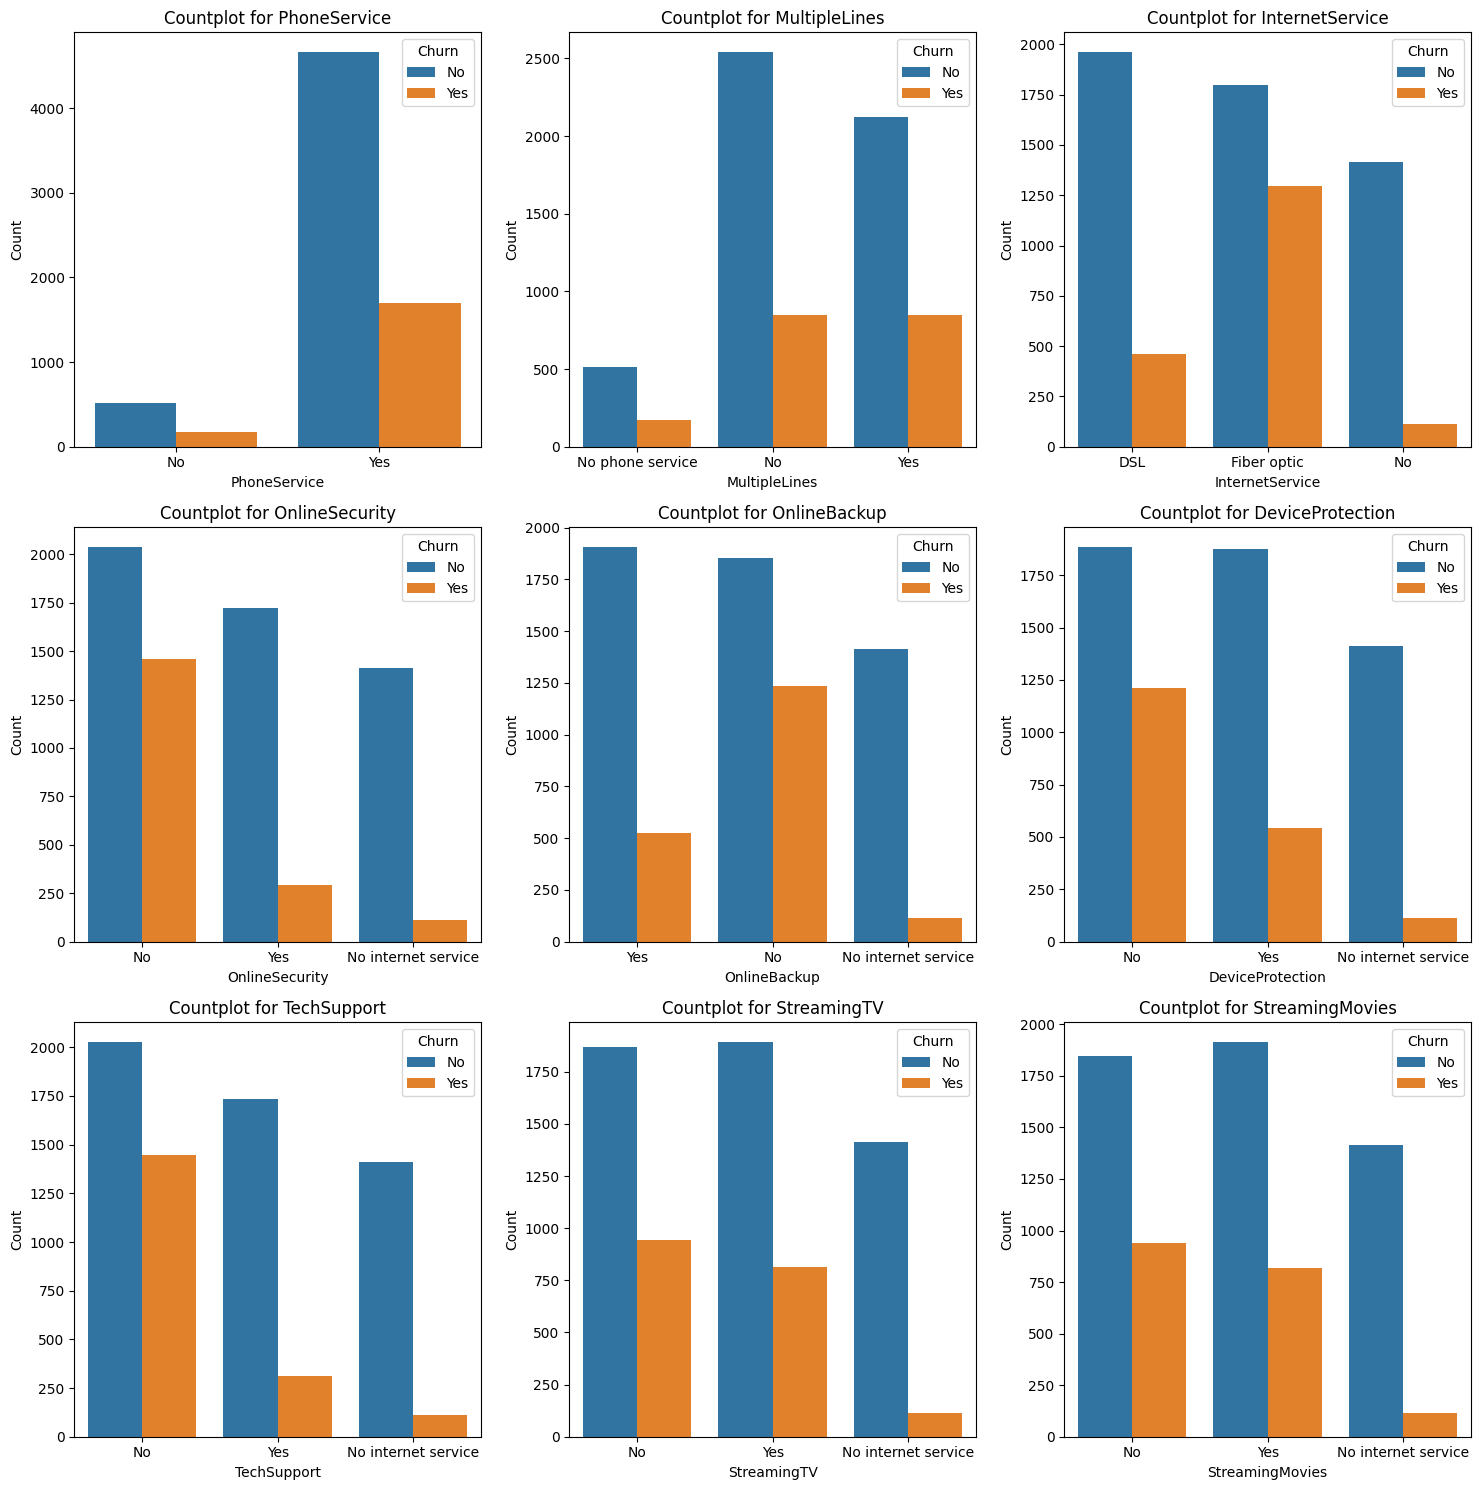

In [20]:
# Columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots
num_cols = 3  # Number of subplots per colum
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide unused axes if any
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#The countplots reveal patterns of customer churn across various telecom services. Customers without additional services like OnlineSecurity, TechSupport, and OnlineBackup tend to exhibit higher churn rates. Those using StreamingTV and StreamingMovies also show notable churn, especially when these services are active. Additionally, the type of InternetService plays a significant role, with fiber optic users having higher churn compared to DSL or no internet service.df.head()

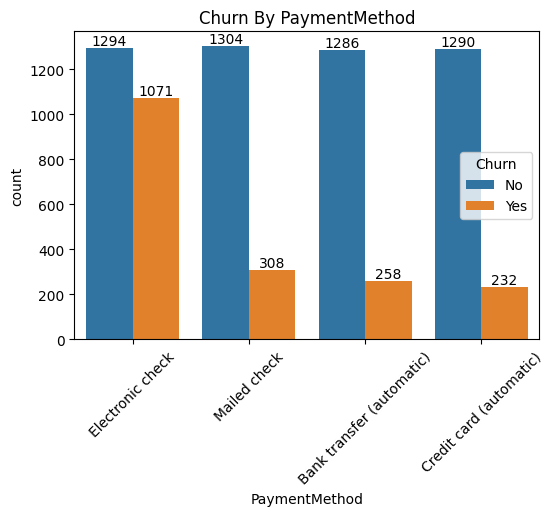

In [21]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churn By PaymentMethod")
plt.show()

#most of the customer churned who have use Electronic check as a   payment methods